# Stochastic Epidemic Population Model

This model depicts a small city with a given population encountering an epidemic. People move around independently and randomly, avoiding obstables placed on the map. If two (or more) people are standing on the same space as a sick person, they have a 90% chance of contracting the illness. The illness wears off after a given amount of steps, but is indpendent for each person. The output shows each time step and the spread of the illness. 

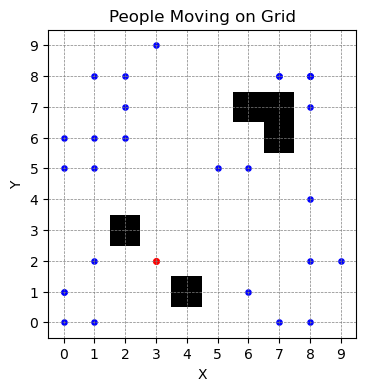

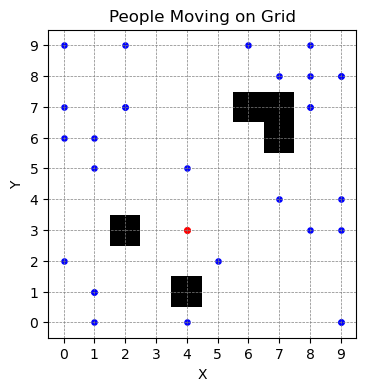

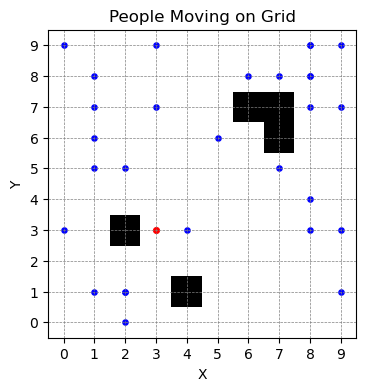

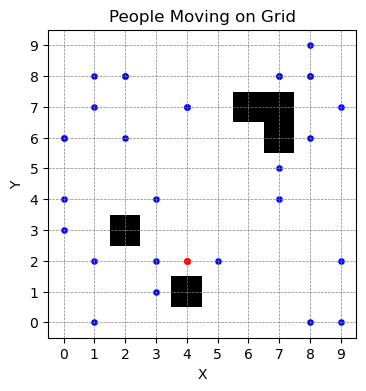

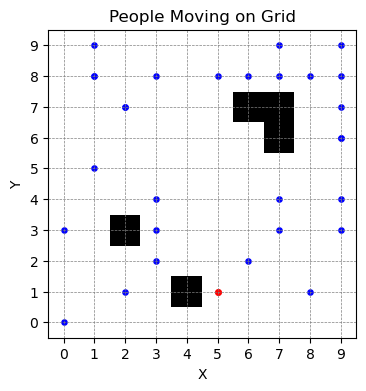

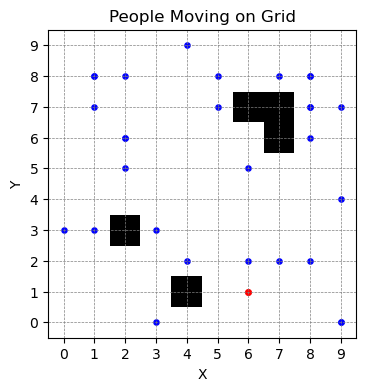

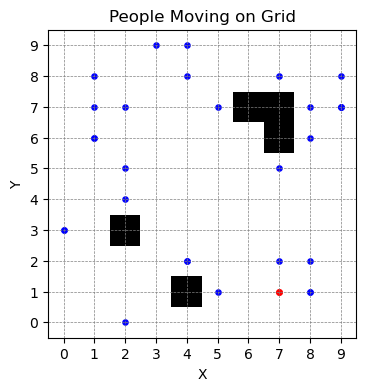

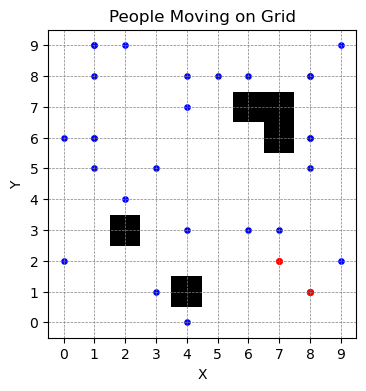

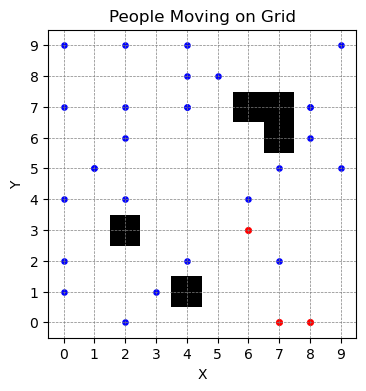

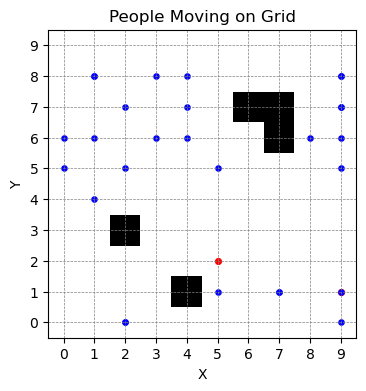

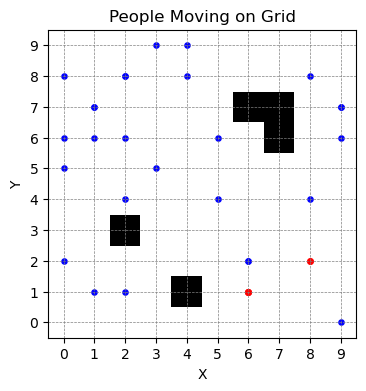

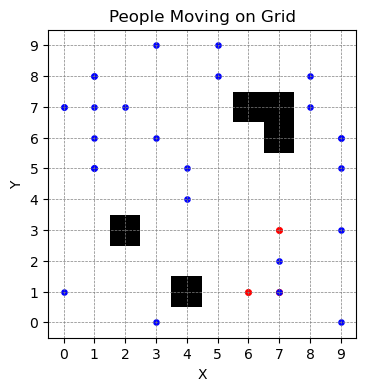

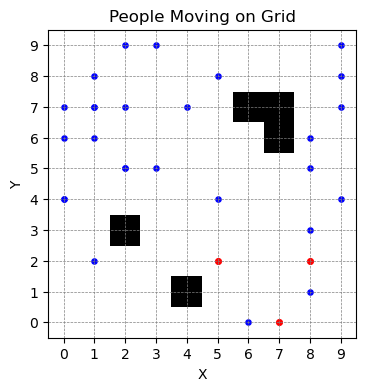

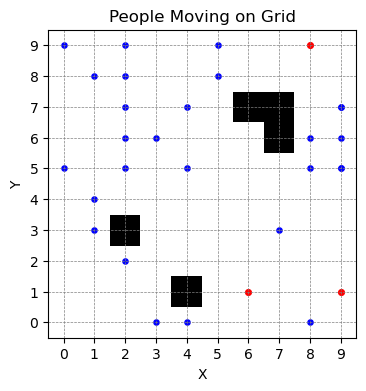

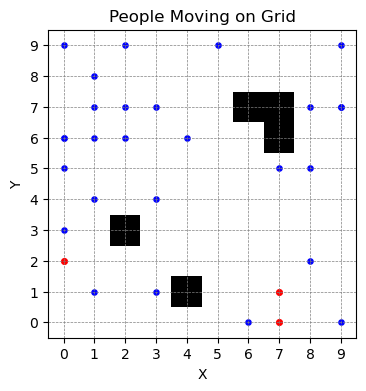

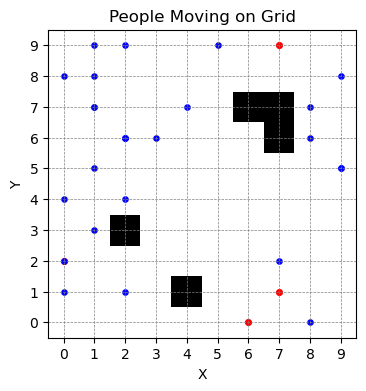

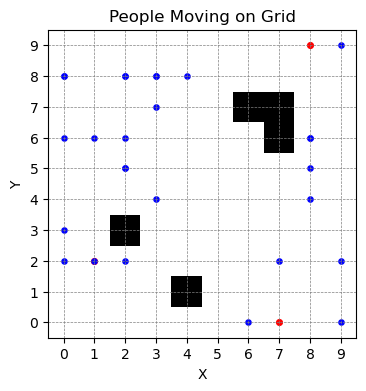

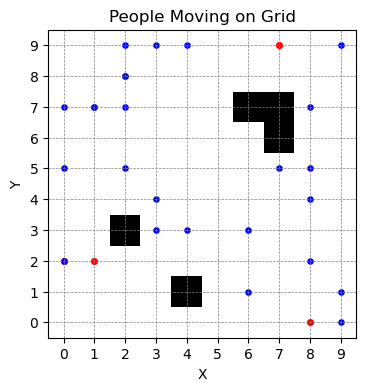

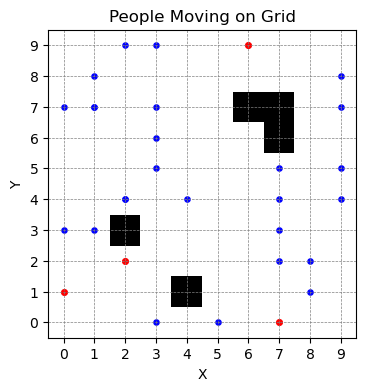

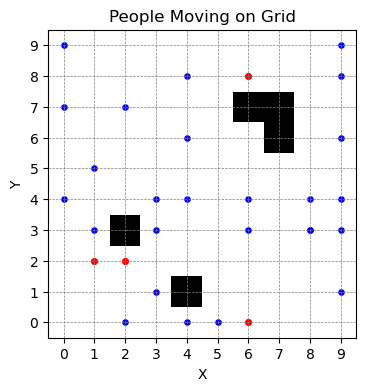

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

class WrappedGrid:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = np.zeros((height, width))

    def get(self, x, y): 
        return self.grid[y % self.height][x % self.width]

    def set(self, x, y, value):
        self.grid[y % self.height][x % self.width] = value

class Person:
    def __init__(self, grid, is_sick=False):
        self.grid = grid
        self.x = random.randint(0, grid.width - 1)  # Initial x-coordinate
        self.y = random.randint(0, grid.height - 1)  # Initial y-coordinate
        self.is_sick = is_sick
        self.sickness_duration = 0
        self.sickduration_rate = random.uniform(0.1, 0.3)  # Random immunity rate between 0.1 and 0.3

    def move(self):
        dx = random.randint(-1, 1)  # Move left, right, or stay
        dy = random.randint(-1, 1)  # Move up, down, or stay

        new_x = (self.x + dx) % self.grid.width # modulo ensures that person stays on grid
        new_y = (self.y + dy) % self.grid.height # if person goes off the grid on the right, they appear on the left

        if self.grid.get(new_x, new_y) != 1:
            self.x = new_x
            self.y = new_y
            if self.is_sick:
                self.transmit_sickness(new_x, new_y)
                self.update_sickness_duration()

    def transmit_sickness(self, x, y):
        for person in people:
            if person.x == x and person.y == y and not person.is_sick:
                if random.random() < 0.9:
                    person.is_sick = True

    def update_sickness_duration(self):
        if self.is_sick:
            self.sickness_duration += 1
            if self.sickness_duration >= 10:  # Assuming a sickness duration of 10 time steps
                #self.is_sick = False
                if random.random() > self.sickduration_rate:
                    self.is_sick = False
                    self.sickness_duration = 0
            else:
                self.is_sick

    def get_position(self):
        return self.x, self.y

class Visualizer:
    def __init__(self, grid, people):
        self.grid = grid
        self.people = people

    def visualize(self):
        plt.figure(figsize=(4, 4))
        plt.imshow(self.grid.grid, cmap='binary', origin='lower')

        for person in self.people:
            if person.is_sick:
                plt.scatter(person.x, person.y, color='red', marker='o', s=17)  # Sick person in red
            else:
                plt.scatter(person.x, person.y, color='blue', marker='o', s=14)  # Healthy person in blue

        plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
        plt.xticks(range(self.grid.width))
        plt.yticks(range(self.grid.height))
        plt.gca().set_xticklabels(range(self.grid.width))
        plt.gca().set_yticklabels(range(self.grid.height))
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('People Moving on Grid')

        plt.show()

# Size of city
width = 10
height = 10
grid = WrappedGrid(width, height)

# Set some obstacles!
grid.set(7, 7, 1)
grid.set(7, 6, 1)
grid.set(6, 7, 1)
grid.set(2, 3, 1)
grid.set(4, 1, 1)

# Create people and visualizer
people = [Person(grid) for _ in range(30)]  # Creating 5 people
people[0].is_sick = True  # Making the first person sick
visualizer = Visualizer(grid, people)

# Move the people around the grid and visualize
for _ in range(20):
    for person in people:
        person.move()
    visualizer.visualize()
